In [1]:
from misc import *
from model_vgg19 import *

In [2]:
device = gpu_()
print(device)

cuda


In [3]:
input = "data"

In [4]:
output = "output"

In [5]:
train_ration = 0.6
val_ration = 0.2
test_ration = 0.2
image_size = 224
degree = 5
batch_size = 32
num_images = 4  #this is the number of images i want to see for the visualization purposes only
num_classes = 4  #this is the length of total classes in each training, validation and testing
learning_rate = 0.0001
num_epochs = 2

In [6]:
splitfolders = train_test_split(input, output, train_ration, val_ration, test_ration)
print(f"Completed Splitting")

Copying files: 5631 files [00:03, 1834.79 files/s]

Completed Splitting


In [7]:
train_folder = os.path.join(output, "train")
print(f"Train Folder")
val_folder = os.path.join(output, "val")
print(f"Validation Folder")
test_folder = os.path.join(output, "test")
print(f"Test Folder")

Train Folder
Validation Folder
Test Folder


In [8]:
path = os.listdir(train_folder)
# print(len(os.listdir(train_folder)))

In [9]:
train_transforming = train_transforms(image_size, degree)
val_test_transforming = val_test_transforms(image_size)

In [10]:
train_image = datasets.ImageFolder(train_folder, transform = train_transforming)
val_image = datasets.ImageFolder(val_folder, transform=val_test_transforming)
test_image = datasets.ImageFolder(test_folder, transform=val_test_transforming)

In [11]:
train_dataloaders = DataLoader(train_image, batch_size = batch_size, shuffle = True)
val_dataloaders = DataLoader(val_image, batch_size = batch_size, shuffle = False)
test_dataloaders = DataLoader(test_image, batch_size=batch_size, shuffle = False)

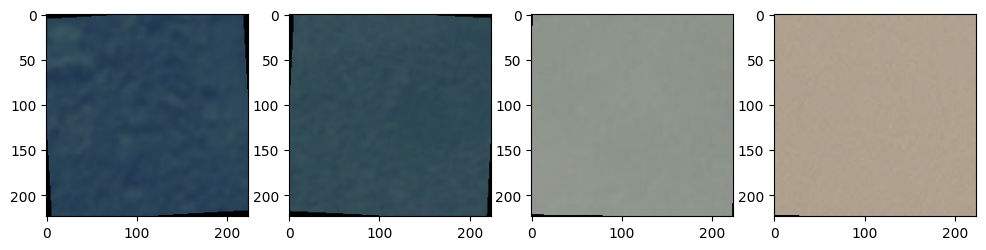

In [12]:
image_visualization(train_dataloaders, num_images)

In [13]:
model = VGG19(num_classes=num_classes).to(device)
print(model)

VGG19(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3),

In [14]:
optimizers = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [15]:
train_loss, train_acc = train(model, train_dataloaders, criterion, optimizers, device)

In [16]:
val_loss, val_acc = validate(model, test_dataloaders, criterion, device)

In [17]:
train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(model, train_dataloaders, val_dataloaders, criterion, optimizers, device, num_epochs = num_epochs)

Epoch [1/2], Train Loss: 0.5792, Train Accuracy: 0.6690, Val Loss: 0.4874, Val Accuracy: 0.6261
Epoch [2/2], Train Loss: 0.4675, Train Accuracy: 0.7152, Val Loss: 0.4353, Val Accuracy: 0.7735


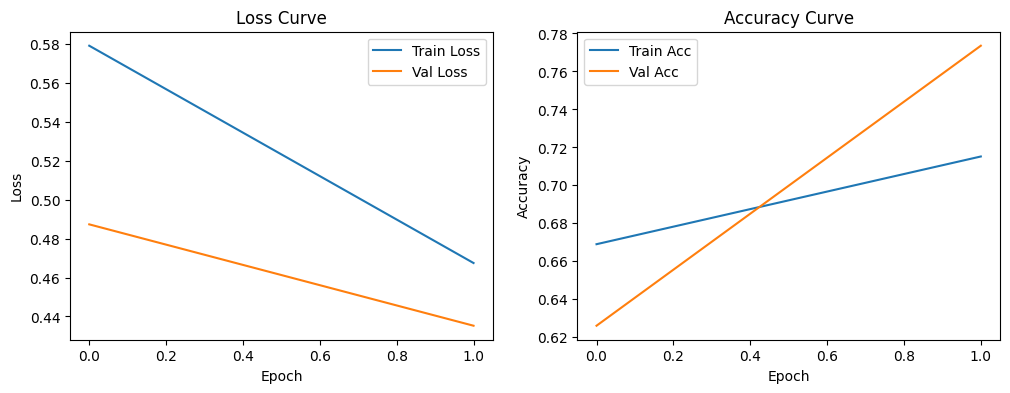

In [18]:
plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

In [19]:
y_true, y_pred = evaluate(model, test_dataloaders, device)
#y_true, y_pred

Confusion Matrix:
[[292   6   0   2]
 [ 10 217   0   0]
 [  0   0 300   0]
 [  3   0 244  53]]


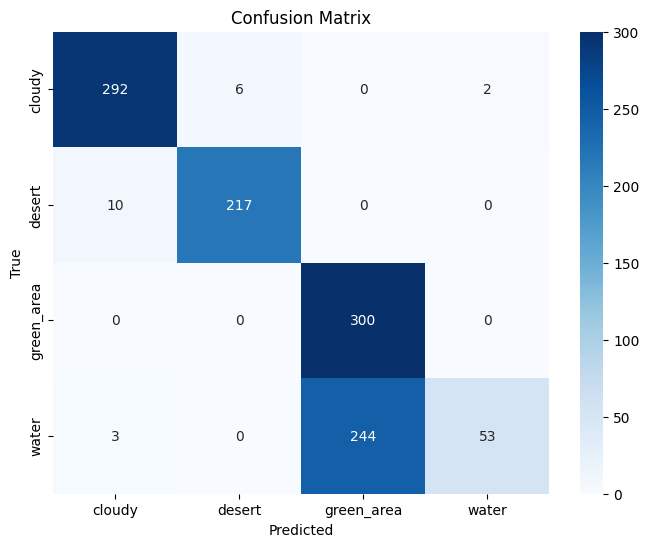

In [20]:
confusion_matrix_graph(y_true, y_pred, path)